In [1]:
library(survival)

mydata<-lung
head(mydata)

inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
3,306,2,74,1,1,90,100,1175,NA
3,455,2,68,1,0,90,90,1225,15
3,1010,1,56,1,0,90,90,NA,15
5,210,2,57,1,1,90,60,1150,11
1,883,2,60,1,0,100,90,NA,0
12,1022,1,74,1,1,50,80,513,0


In [2]:
## Step (1)
## Create the Survival Object
## we need status = 0 --> no event and status = 1 --> event happened
recodestatus<-function(x){
  if(x==1){rs=0} ## no event / censored
  if(x==2){rs=1} ## event happened
  return(rs)

}

for(i in 1:length(mydata$status)){
  mydata$recodedStatus[i]<-recodestatus(mydata$status[i])
}

mySurv<-Surv(time=mydata$time, event = mydata$recodedStatus)
class(mySurv)
head(mySurv)

[1] "Surv"

[1]  306   455  1010+  210   883  1022+

In [3]:
####### B

## single survival curve: no comparisons
myfit<-survfit(mySurv~1) ## signle curve for all patients in 
## the dataset
myfit
median(mydata$time)

Call: survfit(formula = mySurv ~ 1)

      n  events  median 0.95LCL 0.95UCL 
    228     165     310     285     363 

[1] 255.5

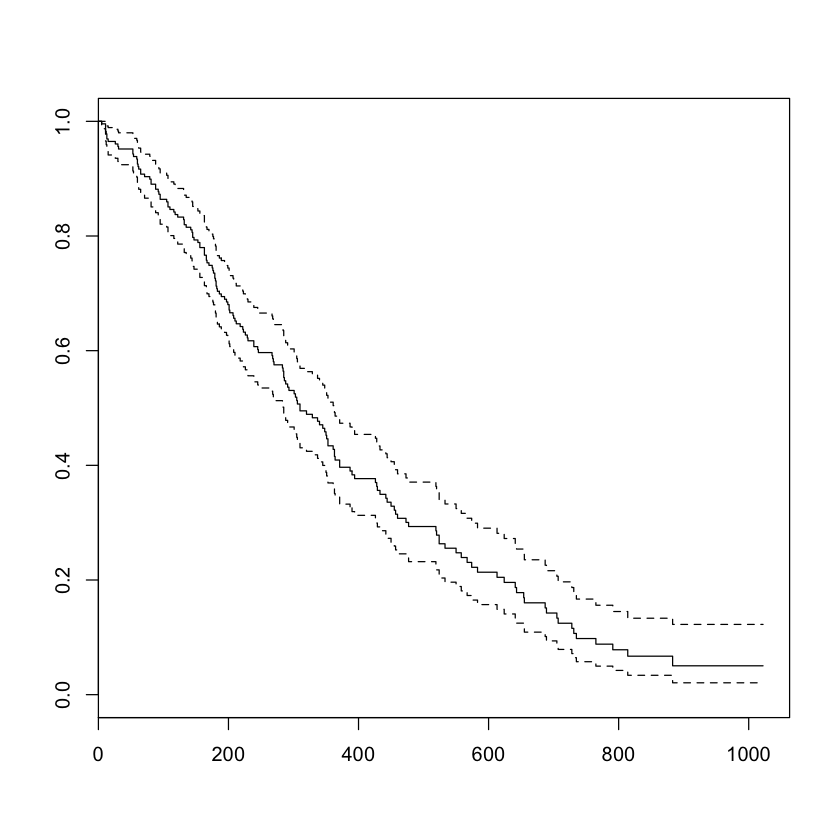

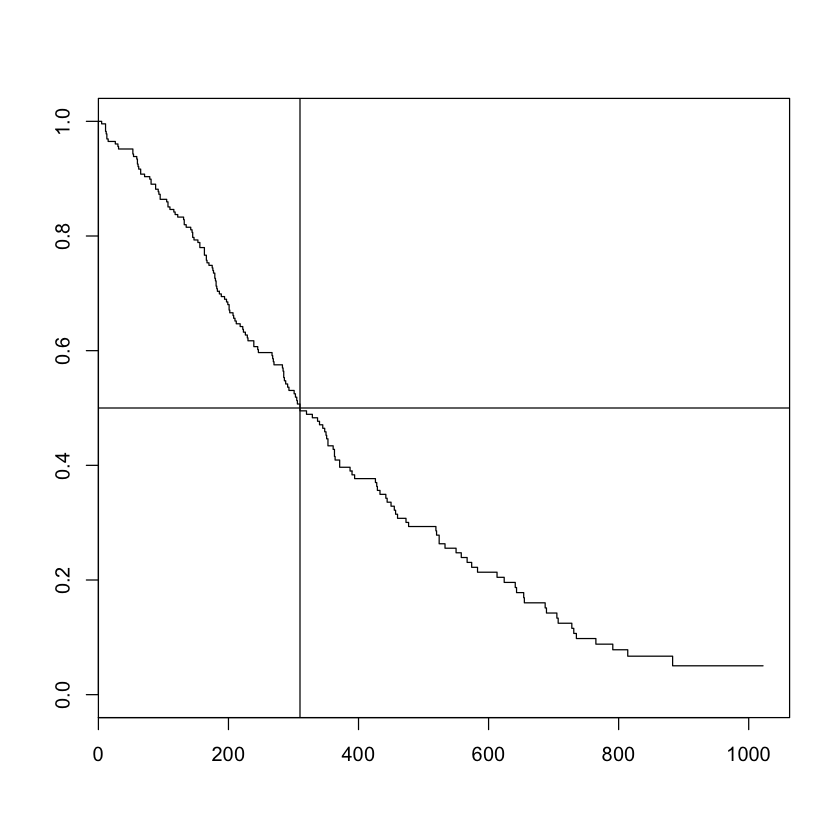

In [4]:
### Median survival is the time at which the survivorship 
### function equals 0.5.
plot(myfit)
plot(myfit, conf.int = "none")
abline(h=0.5)
abline(v=310)

Call: survfit(formula = mySurv ~ mydata$sex)

               n events median 0.95LCL 0.95UCL
mydata$sex=1 138    112    270     212     310
mydata$sex=2  90     53    426     348     550


  1   2 
138  90 

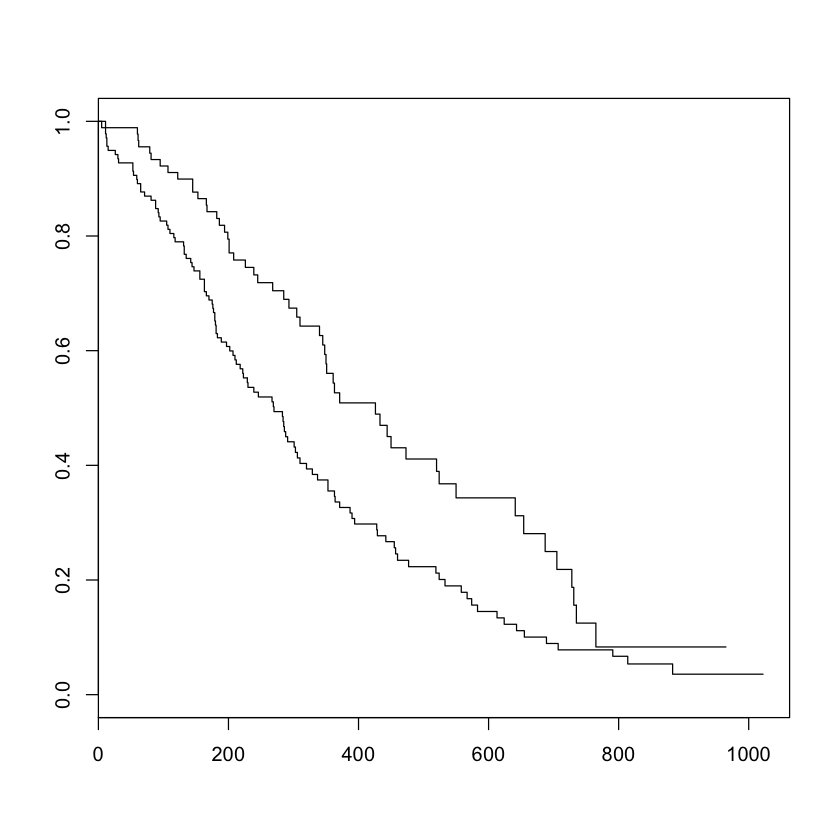

In [5]:
## specify predictor variable in the formula
myfit<-survfit(mySurv~mydata$sex)
myfit
plot(myfit)
table(mydata$sex)

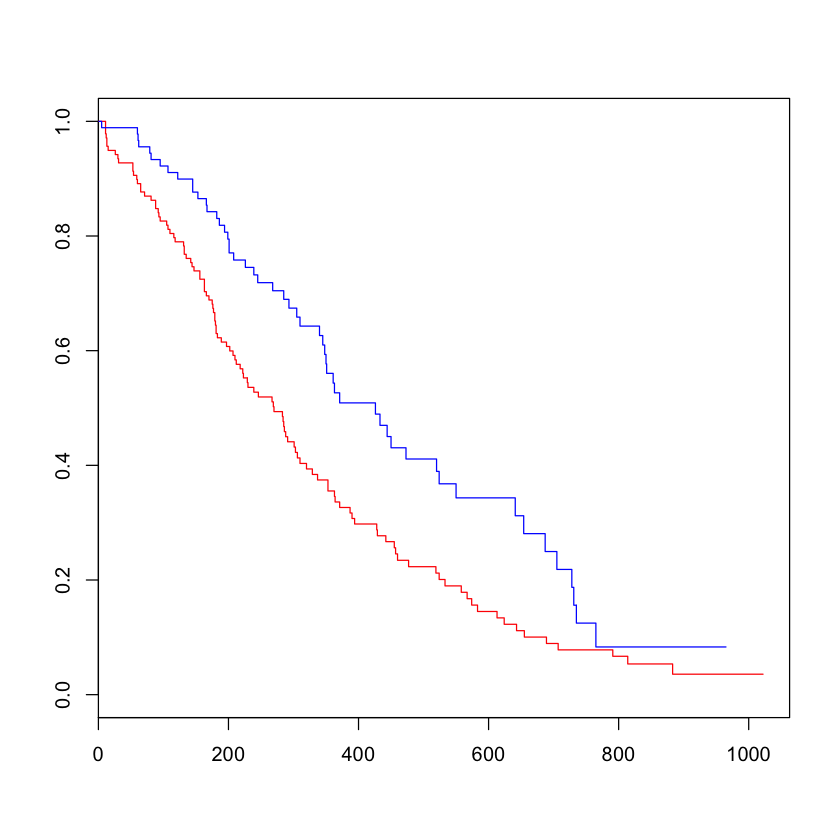

In [7]:
# 1= Male, 2= Female
plot(myfit, col=c("red","blue")) ## red = Male, Blue= female


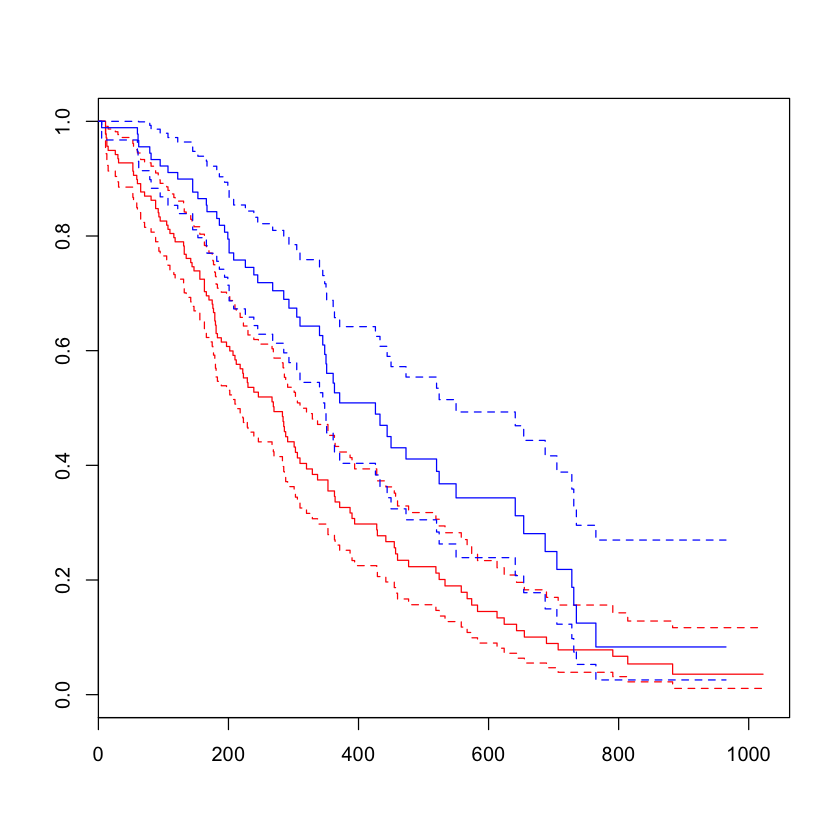

In [8]:
plot(myfit, conf.int = "both", col=c("red","blue"))


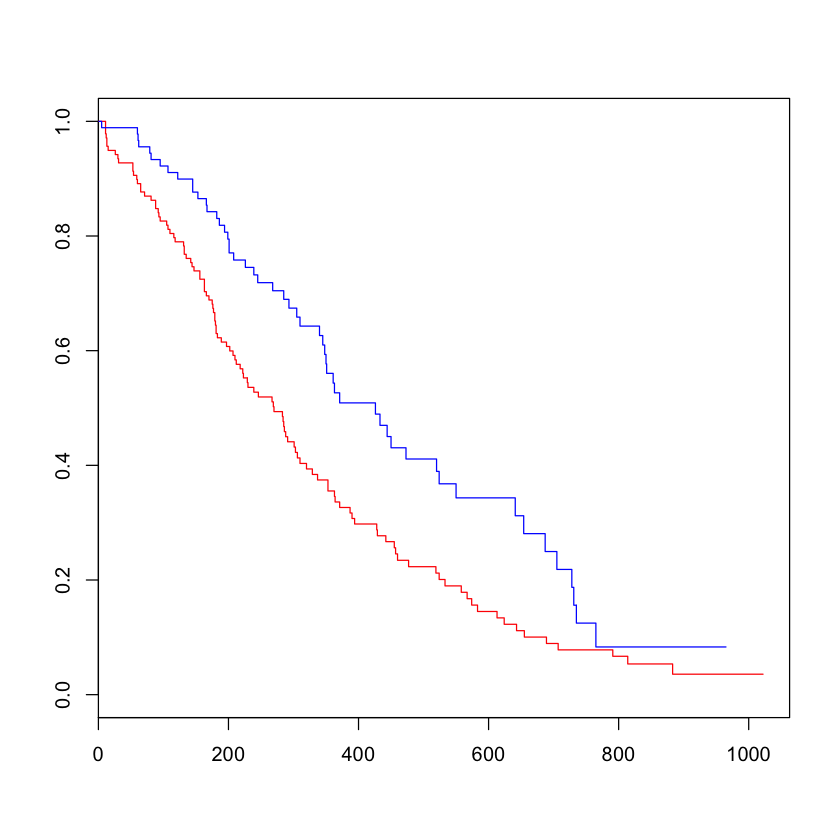

In [9]:
plot(myfit, col=c("red","blue"))


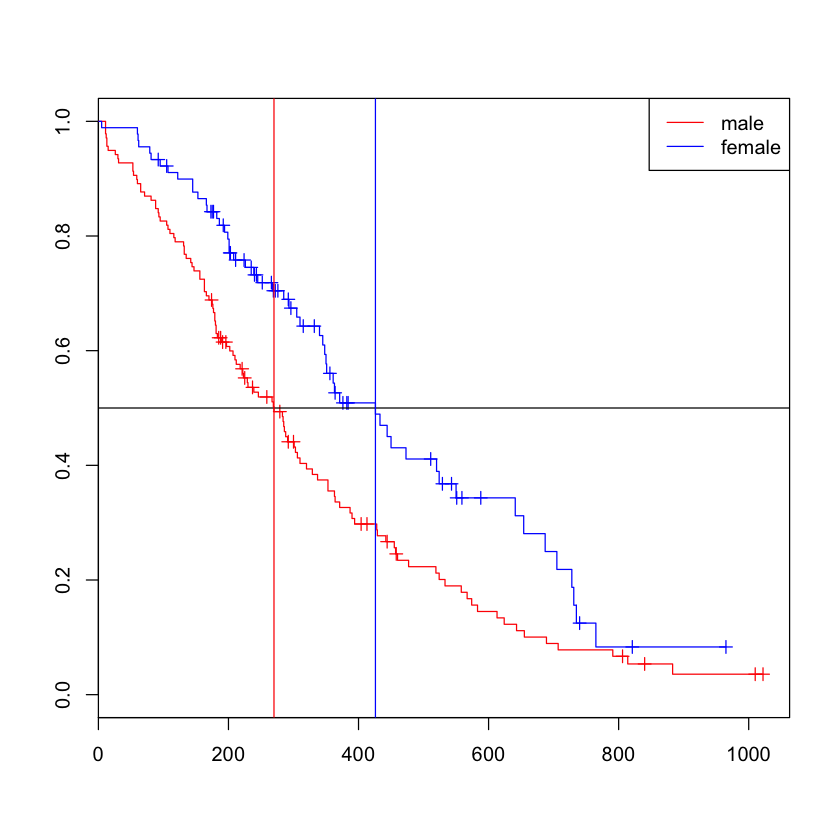

In [10]:
plot(myfit, col=c("red","blue"), mark=3) ## mark.time=T marked at 
## each censoring time
legend("topright", c("male","female"), col=c("red","blue"), lty=1)
abline(h=0.5)
abline(v=270, col="red")
abline(v=426, col="blue")

Call:
survdiff(formula = mySurv ~ mydata$sex)

               N Observed Expected (O-E)^2/E (O-E)^2/V
mydata$sex=1 138      112     91.6      4.55      10.3
mydata$sex=2  90       53     73.4      5.68      10.3

 Chisq= 10.3  on 1 degrees of freedom, p= 0.00131 

Call:
coxph(formula = mySurv ~ mydata$sex + mydata$age)

               coef exp(coef) se(coef)     z      p
mydata$sex -0.51322   0.59857  0.16746 -3.06 0.0022
mydata$age  0.01705   1.01719  0.00922  1.85 0.0646

Likelihood ratio test=14.1  on 2 df, p=0.000857
n= 228, number of events= 165 

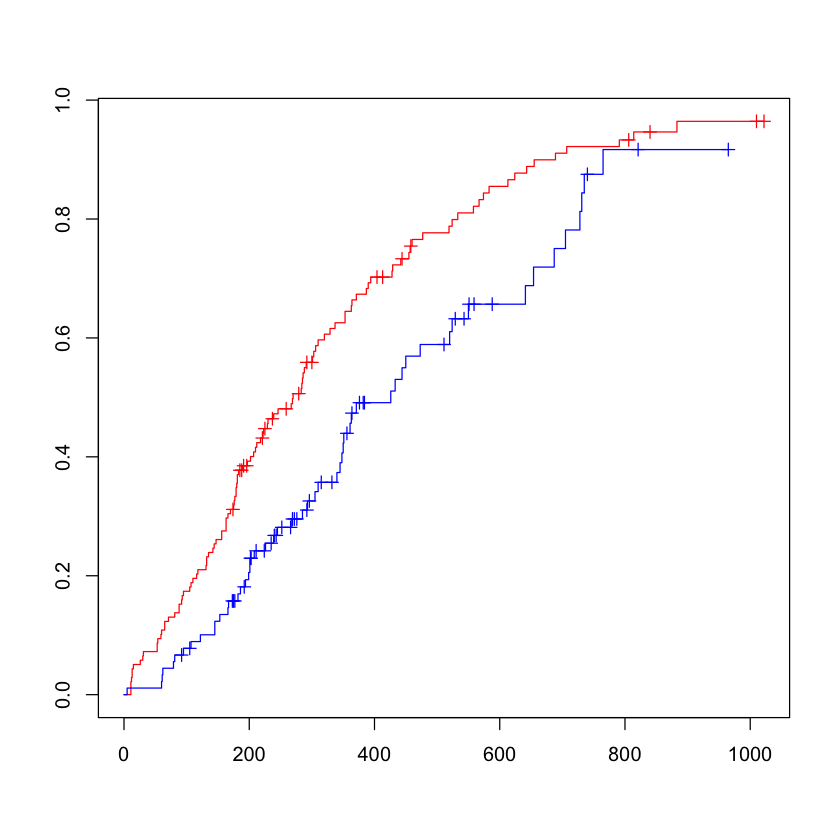

In [11]:
## Now we see that survival of females is better, 
## Q: Is it better by chance, or statistically significant?
survdiff(mySurv~mydata$sex)

###  plot the inverse of a survival function

plot(myfit, fun="event", col=c("red","blue"), mark=3)


### End B

### C

coxph(mySurv~mydata$sex+mydata$age)